### 1)Importing Libraries

In [1]:
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings   
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

### 2) Reading Dataset- "application_data"

In [2]:
# Reading file
bank_data=  pd.read_csv("application_data.csv")
bank_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
# Data Shape
bank_data.shape

(307511, 122)

In [4]:
# Datatypes
bank_data.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

### 3) Handling Null Values

In [5]:
# Null Values percentage in each columns
x= (bank_data.isnull().sum()/len(bank_data)*100).sort_values(ascending=False)
x

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [6]:
# Storing columns in new variable which have more than 32% null values so that it can be dropped.
null_col = bank_data.isnull().sum().sort_values(ascending = False)
null_col_32 = null_col[null_col.values >(0.32*len(bank_data))]
len(null_col_32)

49

#### 3.1) Dropping columns

Here we can see that there are 49 columns having null values greater than 32 % and now we will drop it.

In [7]:
# Dropping these columns
bank_data.drop(columns= null_col_32.index,inplace=True)

In [8]:
# Rechecking pending null values columns percentage in each columns
(bank_data.isnull().sum()/len(bank_data)*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3 

#### 3.2) Imputing values for pending null value columns : 13-14% Null Values

In [9]:
# for column starting with AMT_REQ_CREDIT

arcb = ["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]

bank_data[arcb].describe()

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,1.899974,0.265474,0.267395,0.034362,0.007000,0.006402
std,1.869295,0.794056,0.916002,0.204685,0.110757,0.083849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,261.000000,27.000000,8.000000,9.000000,4.000000


As seen above, all are non continuos numerical column and have approximately 13% null values so we will impute the values with median.

In [10]:
# Replacing it with median
bank_data.fillna(bank_data[arcb].median(), inplace=True)

In [11]:
#Rechecking again percentage of  null values for each column
(bank_data.isnull().sum()/len(bank_data)*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_10                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3                 0.000000
FLAG_DOCUMENT_4                 0.000000
FLAG_DOCUMENT_5                 0.000000
FLAG_DOCUMENT_6                 0.000000
FLAG_DOCUMENT_7                 0.000000
FLAG_DOCUMENT_8                 0.000000
FLAG_DOCUMENT_9                 0.000000
SK_ID_CURR                      0.000000
FLAG_DOCUMENT_11                0.000000
FLAG_DOCUMENT_20                0.000000
AMT_REQ_CREDIT_B

#### 3.3) Dealing with columns having null values less than 1 % 

In [12]:
# Imputing null values with median as these are numerical and non continuos columns.
other = ["OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","AMT_GOODS_PRICE","AMT_ANNUITY","CNT_FAM_MEMBERS","DAYS_LAST_PHONE_CHANGE","EXT_SOURCE_2"]

bank_data.fillna(bank_data[other].median(), inplace=True)

In [13]:
#Categorial column hence doing it sepeartely and replacing it with mode.
bank_data.NAME_TYPE_SUITE.fillna(bank_data.NAME_TYPE_SUITE.mode()[0],inplace = True)

In [14]:
#Rechecking again percentage of  null values for each column
(bank_data.isnull().sum()/len(bank_data)*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
SK_ID_CURR                      0.000000
FLAG_DOCUMENT_7                 0.000000
FLAG_DOCUMENT_6                 0.000000
FLAG_DOCUMENT_5                 0.000000
FLAG_DOCUMENT_4                 0.000000
FLAG_DOCUMENT_3                 0.000000
FLAG_DOCUMENT_2                 0.000000
DAYS_LAST_PHONE_CHANGE          0.000000
FLAG_DOCUMENT_9                 0.000000
DEF_60_CNT_SOCIAL_CIRCLE        0.000000
OBS_60_CNT_SOCIAL_CIRCLE        0.000000
DEF_30_CNT_SOCIAL_CIRCLE        0.000000
OBS_30_CNT_SOCIAL_CIRCLE        0.000000
EXT_SOURCE_2                    0.000000
ORGANIZATION_TYPE               0.000000
FLAG_DOCUMENT_8                 0.000000
FLAG_DOCUMENT_10                0.000000
REG_CITY_NOT_WORK_CITY          0.000000
FLAG_DOCUMENT_11                0.000000
AMT_REQ_CREDIT_BUREAU_QRT       0.000000
AMT_REQ_CREDIT_BUREAU_MON       0.000000
AMT_REQ_CREDIT_BUREAU_WEEK      0.000000
AMT_REQ_CREDIT_B

Now only 2 columns are left with null values 

#### 3.4) Dealing with 2 columns which does not look relevant and one of them has null values

In [15]:
# column EXT_SOURCE_3 does not look relevant based on column description hence dropping it
bank_data.drop("EXT_SOURCE_3",axis =1 ,inplace=True)

In [16]:
# column EXT_SOURCE_2 does not look relevant based on column description hence dropping it
bank_data.drop("EXT_SOURCE_2",axis =1 ,inplace=True)

#### 3.5) Column- OCCUPATION_TYPE

In [17]:
#identifying percentage for each values of occupation

bank_data["OCCUPATION_TYPE"].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

As column has 32% of null values so replacing it with mode won't be suitable option and thus creating a new value "Unknown" and will replace null values with Unknown.

In [18]:
# Replacing with Unknown
bank_data["OCCUPATION_TYPE"]= bank_data["OCCUPATION_TYPE"].fillna("Unknown")

In [19]:
#Rechecking again percentage of  null values for each column
(bank_data.isnull().sum()/len(bank_data)*100).sort_values(ascending=False)

SK_ID_CURR                     0.0
FLAG_DOCUMENT_2                0.0
FLAG_DOCUMENT_8                0.0
FLAG_DOCUMENT_7                0.0
FLAG_DOCUMENT_6                0.0
FLAG_DOCUMENT_5                0.0
FLAG_DOCUMENT_4                0.0
FLAG_DOCUMENT_3                0.0
DAYS_LAST_PHONE_CHANGE         0.0
FLAG_DOCUMENT_10               0.0
DEF_60_CNT_SOCIAL_CIRCLE       0.0
OBS_60_CNT_SOCIAL_CIRCLE       0.0
DEF_30_CNT_SOCIAL_CIRCLE       0.0
OBS_30_CNT_SOCIAL_CIRCLE       0.0
ORGANIZATION_TYPE              0.0
LIVE_CITY_NOT_WORK_CITY        0.0
FLAG_DOCUMENT_9                0.0
FLAG_DOCUMENT_11               0.0
REG_CITY_NOT_LIVE_CITY         0.0
FLAG_DOCUMENT_20               0.0
AMT_REQ_CREDIT_BUREAU_QRT      0.0
AMT_REQ_CREDIT_BUREAU_MON      0.0
AMT_REQ_CREDIT_BUREAU_WEEK     0.0
AMT_REQ_CREDIT_BUREAU_DAY      0.0
AMT_REQ_CREDIT_BUREAU_HOUR     0.0
FLAG_DOCUMENT_21               0.0
FLAG_DOCUMENT_19               0.0
FLAG_DOCUMENT_12               0.0
FLAG_DOCUMENT_18    

As seen above now we have dealt with all null values and no more column is left with null values.

### 4) Deleting Unimportant colums

In [20]:
# Deleting of lesser important columns based on description

del_Col= ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

bank_data.drop(del_Col,axis=1,inplace=True)

In [21]:
# dropping few other column based on description as it will not add any insights due to less domain knowledge.
other_del= ["REGION_POPULATION_RELATIVE","FLAG_EMAIL","REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY","DAYS_LAST_PHONE_CHANGE"]

bank_data.drop(other_del,axis=1,inplace=True )

In [22]:
# Displaying dataset with leftover columns
bank_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648.0,-2120,Laborers,1.0,WEDNESDAY,10,Business Entity Type 3,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186.0,-291,Core staff,2.0,MONDAY,11,School,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260.0,-2531,Laborers,1.0,MONDAY,9,Government,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833.0,-2437,Laborers,2.0,WEDNESDAY,17,Business Entity Type 3,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311.0,-3458,Core staff,1.0,THURSDAY,11,Religion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# Shape
bank_data.shape

(307511, 35)

As seen above, we are left with 35 columns and 307511 rows.

### 5) Standardisation and Datatypes Correction

In [24]:
# Describe 

bank_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,-16036.995067,63815.045904,-4986.120328,-2994.202373,2.152664,12.063419,1.417523,0.142944,1.400626,0.099717,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,4363.988632,141275.766519,3522.886321,1509.450419,0.910679,3.265832,2.398395,0.446033,2.377224,0.361735,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,-25229.000000,-17912.000000,-24672.000000,-7197.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,-19682.000000,-2760.000000,-7479.500000,-4299.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,-15750.000000,-1213.000000,-4504.000000,-3254.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,-12413.000000,-289.000000,-2010.000000,-1720.000000,3.000000,14.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,-7489.000000,365243.000000,0.000000,0.000000,20.000000,23.000000,348.000000,34.000000,344.000000,24.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


#### 5.1) Negative values columns

In [26]:
# columns DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE have negative values and this needs to be corrected as days cannot be in negative.
col_days= ["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"]

# To convert into positive ,using abs
bank_data[col_days]=abs(bank_data[col_days])

In [27]:
# Rechecking with describe if negative values are dealt with.
# Describe 

bank_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,16036.995067,67724.742149,4986.120328,2994.202373,2.152664,12.063419,1.417523,0.142944,1.400626,0.099717,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,4363.988632,139443.751806,3522.886321,1509.450419,0.910679,3.265832,2.398395,0.446033,2.377224,0.361735,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,7489.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,12413.000000,933.000000,2010.000000,1720.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,15750.000000,2219.000000,4504.000000,3254.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,19682.000000,5707.000000,7479.500000,4299.000000,3.000000,14.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,25229.000000,365243.000000,24672.000000,7197.000000,20.000000,23.000000,348.000000,34.000000,344.000000,24.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


As seen above all negative values for days columns is mitigated.

In [28]:
# datatypes 

bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 35 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307511 non-null  float64
 10  AMT_GOODS_PRICE             307511 non-null  float64
 11  NAME_TYPE_SUITE             307511 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

#### 5.2) Converting few columns to categorical

In [29]:
cat_col = ['NAME_CONTRACT_TYPE','CODE_GENDER',"FLAG_OWN_CAR",'FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_TYPE_SUITE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','CNT_FAM_MEMBERS','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','WEEKDAY_APPR_PROCESS_START','CNT_CHILDREN']

for col in cat_col:
    bank_data[col] = pd.Categorical(bank_data[col])

In [30]:
# rechecking dtypes

bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 35 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307511 non-null  int64   
 1   TARGET                      307511 non-null  int64   
 2   NAME_CONTRACT_TYPE          307511 non-null  category
 3   CODE_GENDER                 307511 non-null  category
 4   FLAG_OWN_CAR                307511 non-null  category
 5   FLAG_OWN_REALTY             307511 non-null  category
 6   CNT_CHILDREN                307511 non-null  category
 7   AMT_INCOME_TOTAL            307511 non-null  float64 
 8   AMT_CREDIT                  307511 non-null  float64 
 9   AMT_ANNUITY                 307511 non-null  float64 
 10  AMT_GOODS_PRICE             307511 non-null  float64 
 11  NAME_TYPE_SUITE             307511 non-null  category
 12  NAME_INCOME_TYPE            307511 non-null  category
 13 

### 6) Outliers

#### 6.1) Column- DAYS_EMPLOYED

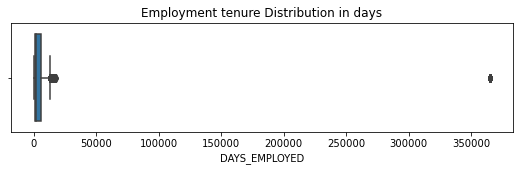

In [31]:
# boxplot to find outlier

plt.figure(figsize=(9,2))
sns.boxplot(bank_data["DAYS_EMPLOYED"])
plt.title('Employment tenure Distribution in days')
plt.show()

max value is 365243 days and if we convert it to years then it is 1000 years of employment which is not possible so this needs correction and this is clearly an outlier.

#### 6.2) Column - DAYS_BIRTH

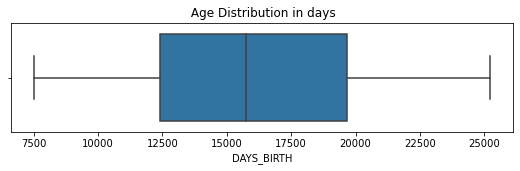

In [32]:
# boxplot to find outlier
plt.figure(figsize=(9,2))
sns.boxplot(bank_data["DAYS_BIRTH"])
plt.title(' Age Distribution in days')
plt.show()

Clearly no outliers.

#### 6.3) Column - AMT_CREDIT

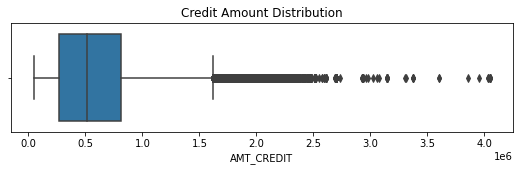

In [33]:
# boxplot to find outlier
plt.figure(figsize=(9,2))
sns.boxplot(bank_data["AMT_CREDIT"])
plt.title('Credit Amount Distribution')
plt.show()

Not much outlier ,can be ignored.

#### 6.4) Column - AMT_ANNUITY

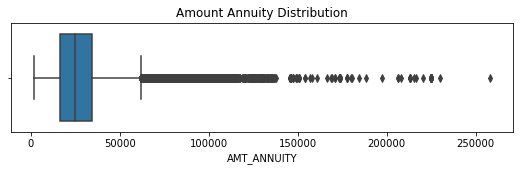

In [34]:
# boxplot to find outlier
plt.figure(figsize=(9,2))
sns.boxplot(bank_data["AMT_ANNUITY"])
plt.title('Amount Annuity Distribution')
plt.show()

Not much outlier ,can be ignored.

#### 6.5) Column - AMT_INCOME

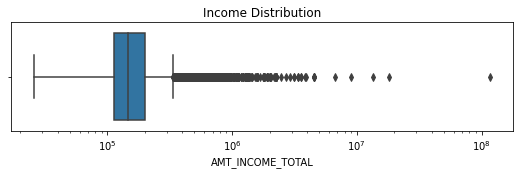

In [35]:
# boxplot to find outlier
plt.figure(figsize=(9,2))
sns.boxplot(bank_data["AMT_INCOME_TOTAL"])
plt.xscale('log')
plt.title('Income Distribution')
plt.show()

Here we can see that outliers is present in the data set.

### 6) Binning

#### 6.1) Column- DAYS_BIRTH

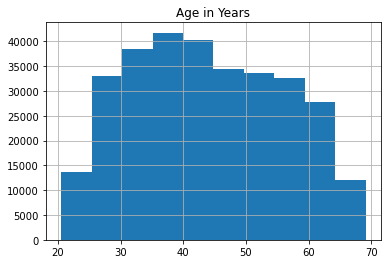

In [36]:
# Converting days to years for better clarity and then binning.
bank_data['AGE_YR']= bank_data['DAYS_BIRTH']/365
# Histogram to select proper bin. 
bank_data['AGE_YR'].hist()   
plt.title('Age in Years')
plt.show()

In [37]:
# Binning
bins= [0,25,35,58,99]

bank_data["AGE_GROUP"]= pd.cut(bank_data["AGE_YR"],bins,labels=['Teen','Youth', 'Middle_Age', 'Senior_Citizen'])

bank_data["AGE_GROUP"].value_counts(normalize=True)*100

Middle_Age        56.772278
Youth             23.512004
Senior_Citizen    15.761713
Teen               3.954005
Name: AGE_GROUP, dtype: float64

#### 6.2) Column- DAYS_EMPLOYED

In [38]:
# Converting days to years for better clarity and then binning.
bank_data["EMP_YR"]= bank_data['DAYS_EMPLOYED']/365
# Binning
bins=[0,1,10,20,99]
bank_data["JOB_EXP"]= pd.cut(bank_data["EMP_YR"],bins,labels=['Fresher','Medium', 'Experienced', 'Experienced++'])

bank_data["JOB_EXP"].value_counts(normalize=True)*100

Medium           68.693755
Experienced      15.229143
Fresher          11.097230
Experienced++     4.979872
Name: JOB_EXP, dtype: float64

#### 6.3) Column- AMT_INCOME_TOTAL

In [39]:
q= [0,0.1,0.2,0.5,0.9,1]
bank_data['AMT_INCOME_BIN'] = pd.qcut(bank_data["AMT_INCOME_TOTAL"], q, labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
bank_data['AMT_INCOME_BIN'].value_counts(normalize=True)*100

HIGH         41.166007
MEDIUM       29.296188
VERY_LOW     10.858473
LOW           9.846802
VERY_HIGH     8.832530
Name: AMT_INCOME_BIN, dtype: float64

#### 6.4) Column- AMT_CREDIT

In [40]:
q= [0,0.1,0.2,0.5,0.9,1]
bank_data['AMT_CREDIT_BIN'] = pd.qcut(bank_data["AMT_CREDIT"], q, labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
bank_data['AMT_CREDIT_BIN'].value_counts(normalize=True)*100

HIGH         40.021007
MEDIUM       28.917340
VERY_LOW     10.797663
LOW          10.315403
VERY_HIGH     9.948587
Name: AMT_CREDIT_BIN, dtype: float64

#### 6.4) Column- AMT_GOODS_PRICE

In [41]:
q= [0,0.1,0.2,0.5,0.9,1]
bank_data['AMT_GOODS_PRICE_BIN'] = pd.qcut(bank_data["AMT_GOODS_PRICE"], q, labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
bank_data['AMT_GOODS_PRICE_BIN'].value_counts(normalize=True)*100

HIGH         38.557645
MEDIUM       28.227608
VERY_LOW     12.839866
LOW          10.396376
VERY_HIGH     9.978505
Name: AMT_GOODS_PRICE_BIN, dtype: float64

### 7) Data Imbalance and other analysis

#### 7.1) Ration of data Imbalance

In [42]:
# DI is to be found with respect to target variable for both part as per problem statement :1(client with payment difficulties) and 0(all other)
repayer = round((bank_data["TARGET"].value_counts()[0]/len(bank_data)* 100),2)
print("repayer",repayer)
defaulter = round((bank_data["TARGET"].value_counts()[1]/len(bank_data)* 100),2)
print("defaulter",defaulter)

Ratio= repayer/defaulter

print("The ratio  with respect to Repayer and defaulter is {0:.2f}/1 ".format(Ratio))

repayer 91.93
defaulter 8.07
The ratio  with respect to Repayer and defaulter is 11.39/1 


### 8) Analysis- Univariate and Bivariate and Correlation

#### 8.1) Univariate Analysis - Categorical 

###### 8.1.1)Name-Contract_Type

In [43]:
# first storing target variable seperatley for both case for ease reference
df=bank_data[bank_data['TARGET']==1]
rp=bank_data[bank_data['TARGET']==0]

Text(0.5, 1.0, 'Contract Type- repayer')

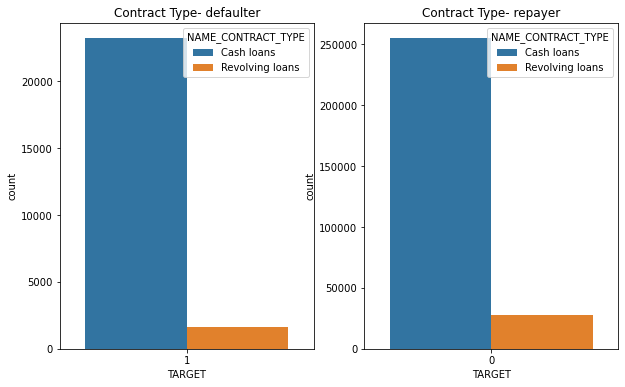

In [44]:
# countplot for name_contract_type column

plt.figure(figsize = (10, 6))
plt.subplot(1,2,1)
sns.countplot(x='TARGET',hue="NAME_CONTRACT_TYPE",data=df)
plt.title('Contract Type- defaulter')
plt.subplot(1,2,2)
sns.countplot(x='TARGET',hue="NAME_CONTRACT_TYPE",data=rp)
plt.title('Contract Type- repayer')

Here, we can see that most of customer have choosen cash loans instead of revolving loan for both defaulters and repayers.

###### 8.1.2)Code_Gender

Text(0.5, 1.0, 'Gender- repayer')

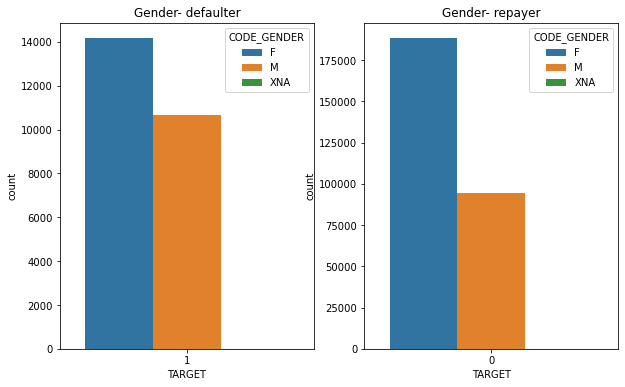

In [45]:
# countplot for code gender column

plt.figure(figsize = (10, 6))
plt.subplot(1,2,1)
sns.countplot(x='TARGET',hue="CODE_GENDER",data=df)
plt.title('Gender- defaulter')
plt.subplot(1,2,2)
sns.countplot(x='TARGET',hue="CODE_GENDER",data=rp)
plt.title('Gender- repayer')

Here we can see that female applied for loans more than male and defaulter is also more in female compared to male.

###### 8.1.3)Age Group

Text(0.5, 1.0, 'Age_Group- repayer')

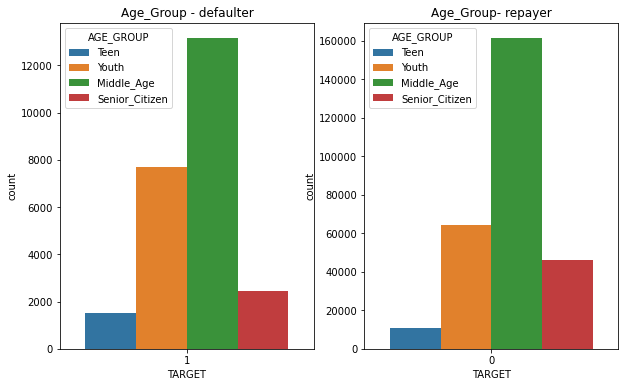

In [46]:
# countplot for age group column

plt.figure(figsize = (10, 6))
plt.subplot(1,2,1)
sns.countplot(x='TARGET',hue="AGE_GROUP",data=df)
plt.title('Age_Group - defaulter')
plt.subplot(1,2,2)
sns.countplot(x='TARGET',hue="AGE_GROUP",data=rp)
plt.title('Age_Group- repayer')

Here we can see that senior citizen(58+) applied for loan most and also they are most likely to pay the loan and also youth(25-35) and senior citizen are defaulter .Therefore, we can target senior citizen(58+) for loans and avoid youth as senior citizens are more likely to repay.

###### 8.1.4)Income Type

Text(0.5, 1.0, 'Income Type- repayer')

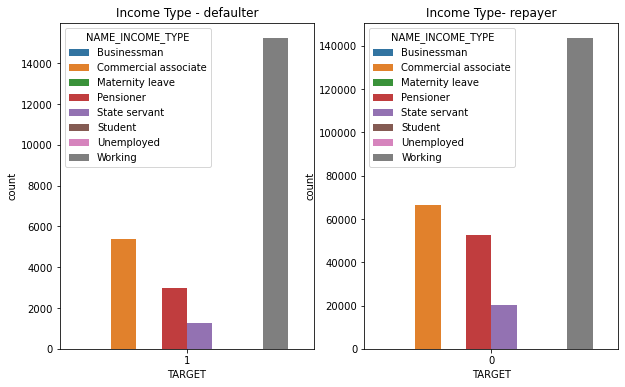

In [47]:
plt.figure(figsize = (10, 6))
plt.subplot(1,2,1)
sns.countplot(x='TARGET',hue="NAME_INCOME_TYPE",data=df)
plt.title('Income Type - defaulter')
plt.subplot(1,2,2)
sns.countplot(x='TARGET',hue="NAME_INCOME_TYPE",data=rp)
plt.title('Income Type- repayer')

Here we can see that Businessman,student,unemployed are less likely to apply for loans.
Working category people have applied for loans most and are likely to default.
State servant category people are less likely to default.

###### 8.1.5)Education type

Text(0.5, 1.0, 'Education Type- repayer')

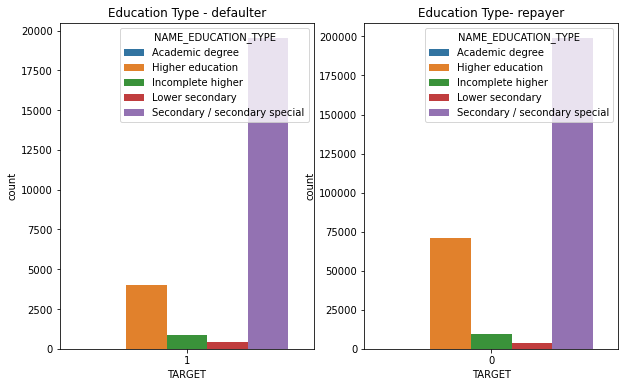

In [48]:
plt.figure(figsize = (10, 6))
plt.subplot(1,2,1)
sns.countplot(x='TARGET',hue="NAME_EDUCATION_TYPE",data=df)
plt.title('Education Type - defaulter')
plt.subplot(1,2,2)
sns.countplot(x='TARGET',hue="NAME_EDUCATION_TYPE",data=rp)
plt.title('Education Type- repayer')

People with secondary education are most likely to apply for loans and most likely to repay and default.
People with higher education are more likely to repay and people with academic degree has less defaults.

###### 8.1.6)Family Status

Text(0.5, 1.0, 'Family Status- repayer')

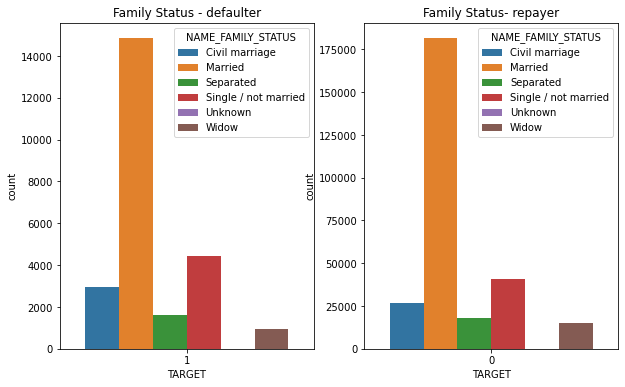

In [49]:
plt.figure(figsize = (10, 6))
plt.subplot(1,2,1)
sns.countplot(x='TARGET',hue="NAME_FAMILY_STATUS",data=df)
plt.title('Family Status - defaulter')
plt.subplot(1,2,2)
sns.countplot(x='TARGET',hue="NAME_FAMILY_STATUS",data=rp)
plt.title('Family Status- repayer')

Married person applied most for loans for both cases and widows are most likely to repay and Single persons are most likely to default.

###### 8.1.7)Housing Type

Text(0.5, 1.0, 'Housing Type- repayer')

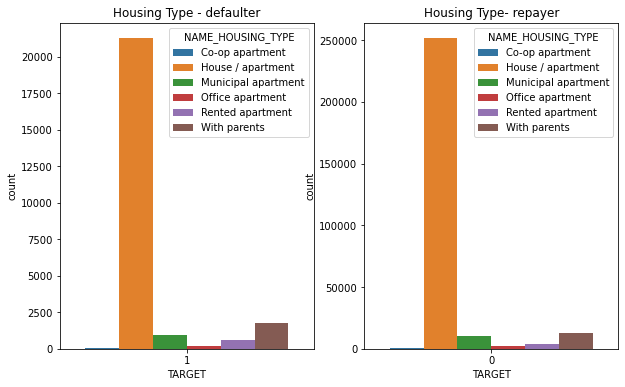

In [50]:
plt.figure(figsize = (10, 6))
plt.subplot(1,2,1)
sns.countplot(x='TARGET',hue="NAME_HOUSING_TYPE",data=df)
plt.title('Housing Type - defaulter')
plt.subplot(1,2,2)
sns.countplot(x='TARGET',hue="NAME_HOUSING_TYPE",data=rp)
plt.title('Housing Type- repayer')

We can see that perople who owns house/apartments applied for loans most.

###### 8.1.8)Amount Income Bin

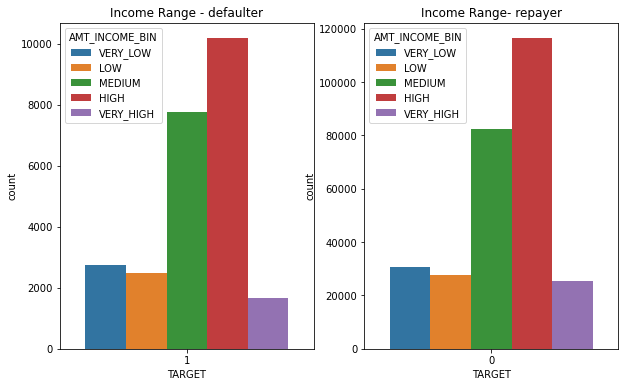

In [51]:
plt.figure(figsize = (10, 6))
plt.subplot(1,2,1)
sns.countplot(x='TARGET',hue="AMT_INCOME_BIN",data=df)
plt.title('Income Range - defaulter')
plt.subplot(1,2,2)
sns.countplot(x='TARGET',hue="AMT_INCOME_BIN",data=rp)
plt.title('Income Range- repayer')
plt.show()

People with High Salary have applied most for loans for both cases followed by Medium Ranged Salary.

###### 8.1.9)Job Exp

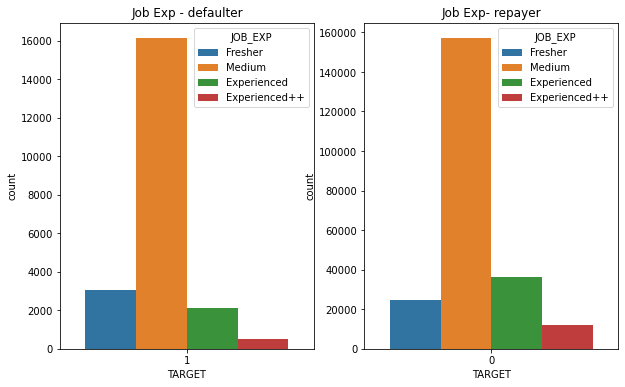

In [52]:
plt.figure(figsize = (10, 6))
plt.subplot(1,2,1)
sns.countplot(x='TARGET',hue="JOB_EXP",data=df)
plt.title('Job Exp - defaulter')
plt.subplot(1,2,2)
sns.countplot(x='TARGET',hue="JOB_EXP",data=rp)
plt.title('Job Exp- repayer')
plt.show()

People with medium experience have applied most for loan for both case and are likley to repay and daefult .Experienced people in job are most likely to repay the loans.

#### 8.2) Bivariate Analysis - Numerical & Numerical wrt TARGET Variable 

###### 8.2.1)amt_goods_price,amt_credit

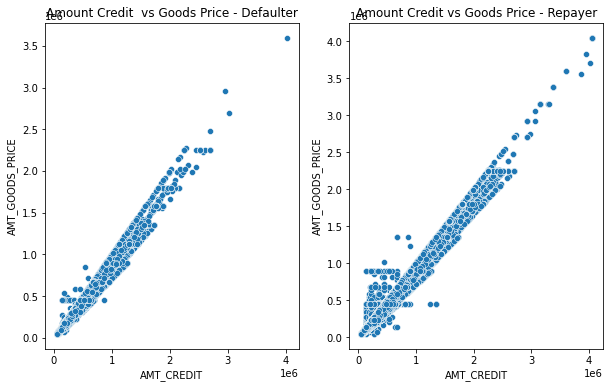

In [53]:
plt.figure(figsize = (10, 6))

plt.subplot(1,2,1)
sns.scatterplot(df["AMT_CREDIT"],df["AMT_GOODS_PRICE"])
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_GOODS_PRICE')
plt.title('Amount Credit  vs Goods Price - Defaulter')

plt.subplot(1,2,2)
sns.scatterplot(rp["AMT_CREDIT"],rp["AMT_GOODS_PRICE"])
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_GOODS_PRICE')
plt.title('Amount Credit vs Goods Price - Repayer')
plt.show()

AMT_CREDIT &  AMT_GOODS_PRICE are related with each other highly for both defaulters and repayers. Both Increases togther.

###### 8.2.2)amt_annuity,amt_credit

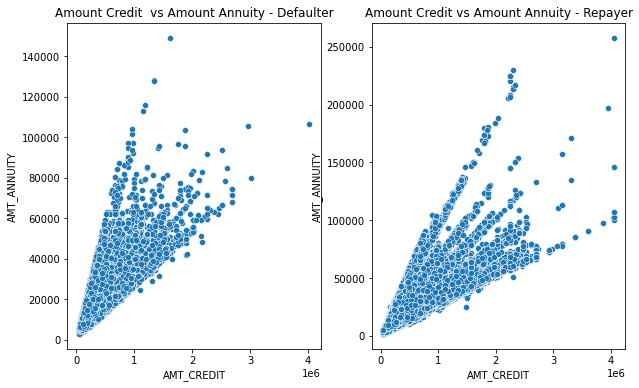

In [54]:
plt.figure(figsize = (10, 6))

plt.subplot(1,2,1)
sns.scatterplot(df["AMT_CREDIT"],df["AMT_ANNUITY"])
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_ANNUITY')
plt.title('Amount Credit  vs Amount Annuity - Defaulter')

plt.subplot(1,2,2)
sns.scatterplot(rp["AMT_CREDIT"],rp["AMT_ANNUITY"])
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_ANNUITY')
plt.title('Amount Credit vs Amount Annuity - Repayer')
plt.show()

AMT_CREDIT and AMT_ANNUITY are related to each other for both defaulters and repayers. Both Increases together.

#### 8.3) Bivariate Analysis - Numerical & Categorical wrt TARGET Variable 

###### 8.3.1)Age group and Income amount

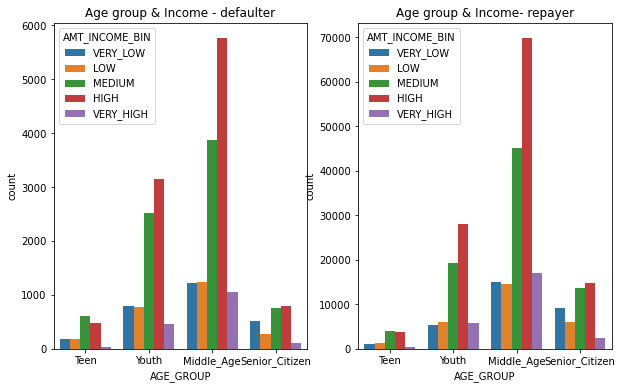

In [55]:
plt.figure(figsize = (10, 6))
plt.subplot(1,2,1)
sns.countplot(x='AGE_GROUP',hue="AMT_INCOME_BIN",data=df)
plt.title('Age group & Income - defaulter')
plt.subplot(1,2,2)
sns.countplot(x='AGE_GROUP',hue="AMT_INCOME_BIN",data=rp)
plt.title('Age group & Income- repayer')
plt.show()

Here we can see that the best target people will be senior citizen with high income range.

###### 8.3.2)Family and Income amount

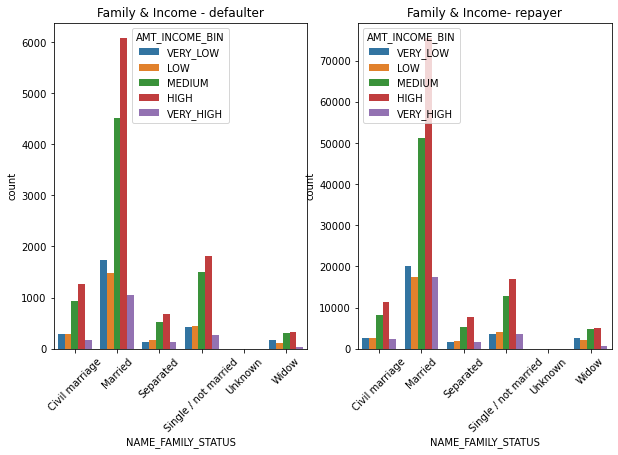

In [56]:
plt.figure(figsize = (10, 6))
plt.subplot(1,2,1)
sns.countplot(x='NAME_FAMILY_STATUS',hue="AMT_INCOME_BIN",data=df)
plt.title('Family & Income - defaulter')
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.countplot(x='NAME_FAMILY_STATUS',hue="AMT_INCOME_BIN",data=rp)
plt.title('Family & Income- repayer')
plt.xticks(rotation=45)
plt.show()

Here we can see that married people with high income range is best for loan sanction.

### 9) Correlation

In [57]:
cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED','DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
                        'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


# Repayers 
Repayer_cor = bank_data.loc[bank_data['TARGET']==0, cols_for_correlation]

# Defaulters 
Defaulter_cor = bank_data.loc[bank_data['TARGET']==1, cols_for_correlation]

###### 9.1) Top 10 corr as per problem statement for repayer

In [58]:
cor_repayer = Repayer_cor.corr()
corr_bds_repayer = cor_repayer .where(np.triu(np.ones(cor_repayer.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_bds_repayer.columns =['VAR1','VAR2','Correlation']
corr_bds_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_bds_repayer["Correlation"]=corr_bds_repayer["Correlation"].abs() 
corr_bds_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_bds_repayer.head(10)

,VAR1,VAR2,Correlation
52,AMT_GOODS_PRICE,AMT_CREDIT,0.987022
53,AMT_GOODS_PRICE,AMT_ANNUITY,0.776421
35,AMT_ANNUITY,AMT_CREDIT,0.771297
89,DAYS_EMPLOYED,DAYS_BIRTH,0.626114
34,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418948
51,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349426
17,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799
106,DAYS_REGISTRATION,DAYS_BIRTH,0.333151
124,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.276663
123,DAYS_ID_PUBLISH,DAYS_BIRTH,0.271314


###### 9.1.1) Heatmap correlation for repayer

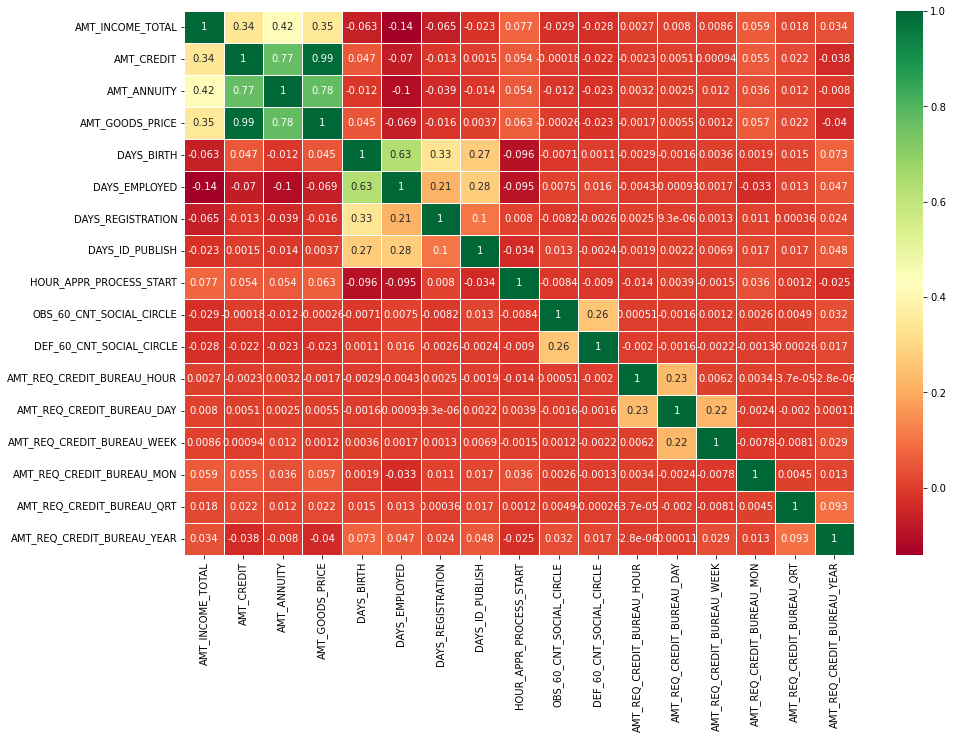

In [59]:
fig = plt.figure(figsize=(15,10))
ax = sns.heatmap(Repayer_cor.corr(), cmap="RdYlGn",annot=True,linewidth =1)

Here Credit amount ,Goods Price Amount,Loan Annuity are highly correlated.

###### 9.2) Top 10 corr as per problem statement for defaulter

In [60]:
cor_defaulter = Repayer_cor.corr()
corr_bds_defaulter = cor_defaulter .where(np.triu(np.ones(cor_repayer.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_bds_defaulter.columns =['VAR1','VAR2','Correlation']
corr_bds_defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_bds_defaulter["Correlation"]=corr_bds_defaulter["Correlation"].abs() 
corr_bds_defaulter.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_bds_defaulter.head(10)

,VAR1,VAR2,Correlation
52,AMT_GOODS_PRICE,AMT_CREDIT,0.987022
53,AMT_GOODS_PRICE,AMT_ANNUITY,0.776421
35,AMT_ANNUITY,AMT_CREDIT,0.771297
89,DAYS_EMPLOYED,DAYS_BIRTH,0.626114
34,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418948
51,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349426
17,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799
106,DAYS_REGISTRATION,DAYS_BIRTH,0.333151
124,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.276663
123,DAYS_ID_PUBLISH,DAYS_BIRTH,0.271314


###### 9.2.1) Heatmap correlation for defaulter

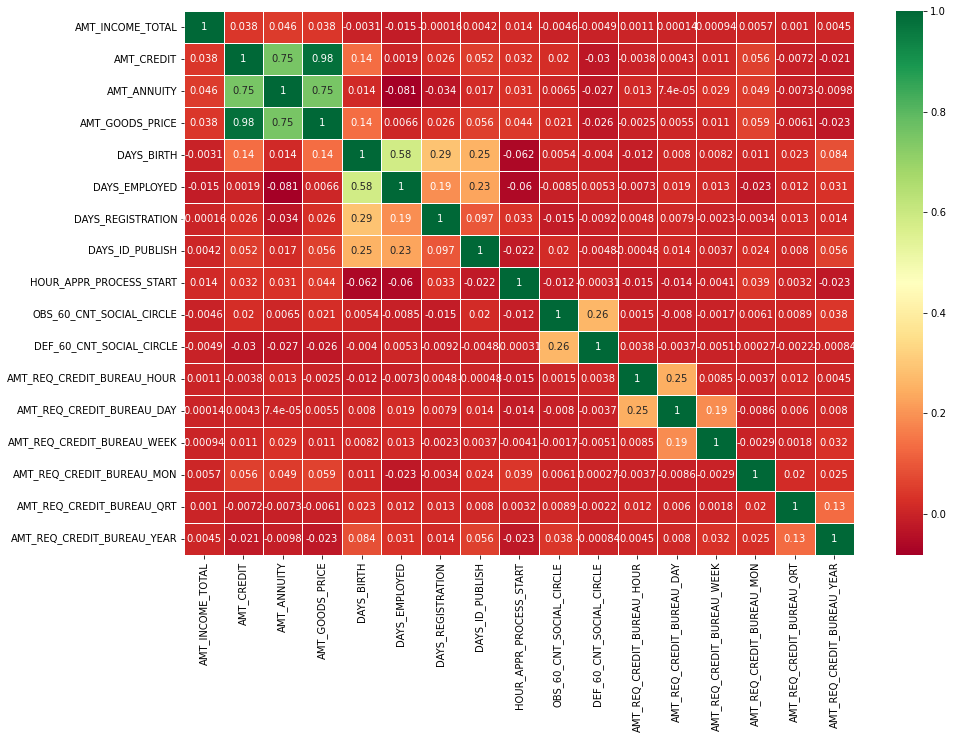

In [61]:
fig = plt.figure(figsize=(15,10))
ax = sns.heatmap(Defaulter_cor.corr(), cmap="RdYlGn",annot=True,linewidth =1)

1)Here Credit amount ,Goods Price Amount,Loan Annuity are highly correlated.

2)Credit amount  correlation with days employed has drastically reduced in defaulters(0.019) when compared to repayers(0.47).

3)There is a severe drop in the correlation between total income of the client and the credit amount(0.038) amongst defaulters whereas it is 0.342 among repayers.

4)Credit amount and Good price amount are highest corelated category.

### 10) Reading Dataset- "previous_application"

In [62]:
# Reading file
prev_data=  pd.read_csv("previous_application.csv")
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# Data Shape
prev_data.shape

(1670214, 37)

In [64]:
# Datatypes
prev_data.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### 10) Handling Null Values

In [65]:
# Null Values percentage in each columns
x1= (prev_data.isnull().sum()/len(prev_data)*100).sort_values(ascending=False)
x1

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [66]:
# Storing columns in new variable which have more than 40% null values so that it can be dropped.
null_col_1 = prev_data.isnull().sum().sort_values(ascending = False)
null_col_1_40 = null_col_1[null_col_1.values >(0.40*len(prev_data))]
len(null_col_1_40)

11

#### 10.1) Dropping null values columns

Here we can see that 11 columns have null value more than 40% so dropping those columns and those column does not look relevant based on description.

In [68]:
# Dropping these columns
prev_data.drop(columns= null_col_1_40.index,inplace=True)

In [69]:
# Rechecking pending null values columns percentage in each columns
(prev_data.isnull().sum()/len(prev_data)*100).sort_values(ascending=False)

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
CODE_REJECT_REASON              0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_PREV                      0.000000
NAME_PAYMENT_TYPE               0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TY

#### 10.2) Imputing values for pending null values columns 

In [70]:
# for rest of pending null values column

prev_pen = ["AMT_GOODS_PRICE","AMT_ANNUITY","CNT_PAYMENT","AMT_CREDIT"]

prev_data[prev_pen].describe()

,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT,AMT_CREDIT
count,1.284699e+06,1.297979e+06,1.297984e+06,1.670213e+06
mean,2.278473e+05,1.595512e+04,1.605408e+01,1.961140e+05
std,3.153966e+05,1.478214e+04,1.456729e+01,3.185746e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.084100e+04,6.321780e+03,6.000000e+00,2.416050e+04
50%,1.123200e+05,1.125000e+04,1.200000e+01,8.054100e+04
75%,2.340000e+05,2.065842e+04,2.400000e+01,2.164185e+05
max,6.905160e+06,4.180581e+05,8.400000e+01,6.905160e+06


In [71]:
# Replacing it with median
prev_data.fillna(prev_data[prev_pen].median(), inplace=True)

In [72]:
# Categorial column hence doing it sepeartely and replacing it with mode.
prev_data.PRODUCT_COMBINATION.fillna(prev_data.PRODUCT_COMBINATION.mode()[0],inplace = True)

In [73]:
# Rechecking pending null values columns percentage in each columns
(prev_data.isnull().sum()/len(prev_data)*100).sort_values(ascending=False)

SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_YIELD_GROUP               0.0
CNT_PAYMENT                    0.0
NAME_SELLER_INDUSTRY           0.0
SELLERPLACE_AREA               0.0
CHANNEL_TYPE                   0.0
NAME_PRODUCT_TYPE              0.0
NAME_PORTFOLIO                 0.0
NAME_GOODS_CATEGORY            0.0
NAME_CLIENT_TYPE               0.0
CODE_REJECT_REASON             0.0
NAME_PAYMENT_TYPE              0.0
DAYS_DECISION                  0.0
NAME_CONTRACT_STATUS           0.0
NAME_CASH_LOAN_PURPOSE         0.0
NFLAG_LAST_APPL_IN_DAY         0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
HOUR_APPR_PROCESS_START        0.0
WEEKDAY_APPR_PROCESS_START     0.0
AMT_GOODS_PRICE                0.0
AMT_CREDIT                     0.0
AMT_APPLICATION                0.0
AMT_ANNUITY                    0.0
NAME_CONTRACT_TYPE             0.0
PRODUCT_COMBINATION            0.0
dtype: float64

All null values have been dealt with.

### 11) Deleting non important colums

In [74]:
# Deleting of lesser important columns based on description

del_Col_1= ['NAME_PORTFOLIO','SELLERPLACE_AREA','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

prev_data.drop(del_Col_1,axis=1,inplace=True)

In [75]:
# Displaying dataset with leftover columns
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,XNA,Country-wide,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,-164,XNA,XAP,Repeater,XNA,x-sell,Contact center,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,x-sell,Credit and cash offices,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,x-sell,Credit and cash offices,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,walk-in,Credit and cash offices,XNA,24.0,high,Cash Street: high


In [76]:
# Shape
prev_data.shape

(1670214, 20)

now we are left with 20 columns.

### 12) Standardisation

In [77]:
# data info to check numerical columns
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 20 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1670214 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670214 non-null  float64
 6   AMT_GOODS_PRICE         1670214 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

In [78]:
# Describe to check negative values in numerical columns
check= ['SK_ID_PREV','SK_ID_CURR','AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_DECISION','CNT_PAYMENT']
prev_data[check].describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,CNT_PAYMENT
count,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06
mean,1.923089e+06,2.783572e+05,1.490651e+04,1.961140e+05,2.011815e+05,-8.806797e+02,1.515057e+01
std,5.325980e+05,1.028148e+05,1.317751e+04,3.185745e+05,2.808629e+05,7.790997e+02,1.295220e+01
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,0.000000e+00
25%,1.461857e+06,1.893290e+05,7.547096e+03,2.416050e+04,6.750000e+04,-1.300000e+03,1.000000e+01
50%,1.923110e+06,2.787145e+05,1.125000e+04,8.054100e+04,1.123200e+05,-5.810000e+02,1.200000e+01
75%,2.384280e+06,3.675140e+05,1.682403e+04,2.164185e+05,1.804050e+05,-2.800000e+02,1.600000e+01
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,-1.000000e+00,8.400000e+01


As seen above DAYS_DECISION column have negative value which needs to be coorrected as days cannot be in negative.

#### 12.1) Negative values columns

In [79]:
# To convert into positive ,using abs
prev_data["DAYS_DECISION"]=abs(prev_data["DAYS_DECISION"])

In [80]:
# Recheck to see any negative values
prev_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,CNT_PAYMENT
count,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06
mean,1.923089e+06,2.783572e+05,1.490651e+04,1.752339e+05,1.961140e+05,2.011815e+05,8.806797e+02,1.515057e+01
std,5.325980e+05,1.028148e+05,1.317751e+04,2.927798e+05,3.185745e+05,2.808629e+05,7.790997e+02,1.295220e+01
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,1.461857e+06,1.893290e+05,7.547096e+03,1.872000e+04,2.416050e+04,6.750000e+04,2.800000e+02,1.000000e+01
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,5.810000e+02,1.200000e+01
75%,2.384280e+06,3.675140e+05,1.682403e+04,1.803600e+05,2.164185e+05,1.804050e+05,1.300000e+03,1.600000e+01
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.922000e+03,8.400000e+01


All negative values column has been corrected.

### 13) Outliers

Based on describe columns which looks to  have outliers are AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE so we will check for only these columns.

#### 13.1) Col- AMT_ANNUITY

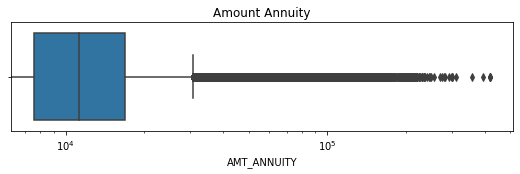

In [81]:
# boxplot to find outlier
plt.figure(figsize=(9,2))
sns.boxplot(prev_data["AMT_ANNUITY"])
plt.xscale('log')
plt.title('Amount Annuity')
plt.show()

#### 13.2) Col- AMT_APPLICATION

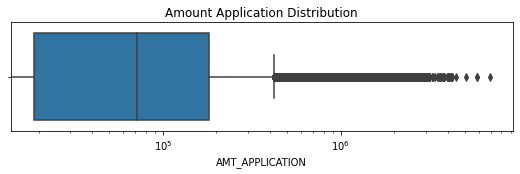

In [82]:
# boxplot to find outlier
plt.figure(figsize=(9,2))
sns.boxplot(prev_data["AMT_APPLICATION"])
plt.xscale('log')
plt.title('Amount Application Distribution')
plt.show()

#### 13.3) Col- AMT_CREDIT

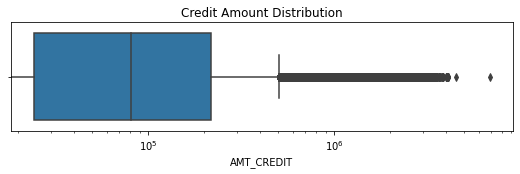

In [83]:
# boxplot to find outlier
plt.figure(figsize=(9,2))
sns.boxplot(prev_data["AMT_CREDIT"])
plt.xscale('log')
plt.title('Credit Amount Distribution')
plt.show()

#### 13.4) Col- AMT_GOODS_PRICE

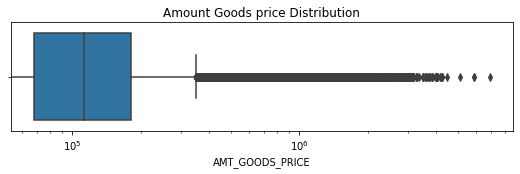

In [84]:
# boxplot to find outlier
plt.figure(figsize=(9,2))
sns.boxplot(prev_data["AMT_GOODS_PRICE"])
plt.xscale('log')
plt.title('Amount Goods price Distribution')
plt.show()

From all 4 boxplot we can observe that all 4 columns have few outliers

### 14) MERGING DATAFRAME

In [85]:
#Merging the previous application & application data file
merged_data= pd.merge(bank_data, prev_data, how='inner', on='SK_ID_CURR',suffixes='_x')
merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_YR,AGE_GROUP,EMP_YR,JOB_EXP,AMT_INCOME_BIN,AMT_CREDIT_BIN,AMT_GOODS_PRICE_BIN,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_GOODS_PRICEx,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,3648.0,2120,Laborers,1.0,WEDNESDAY,10,Business Entity Type 3,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,Youth,1.745205,Medium,HIGH,MEDIUM,MEDIUM,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,606,XNA,XAP,New,Vehicles,XNA,Stone,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186.0,291,Core staff,2.0,MONDAY,11,School,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,Middle_Age,3.254795,Medium,HIGH,VERY_HIGH,VERY_HIGH,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,XNA,Approved,746,XNA,XAP,Repeater,XNA,x-sell,Credit and cash offices,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186.0,291,Core staff,2.0,MONDAY,11,School,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,Middle_Age,3.254795,Medium,HIGH,VERY_HIGH,VERY_HIGH,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,XNA,Stone,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186.0,291,Core staff,2.0,MONDAY,11,School,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,Middle_Age,3.254795,Medium,HIGH,VERY_HIGH,VERY_HIGH,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,Approved,2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,XNA,Country-wide,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,4260.0,2531,Laborers,1.0,MONDAY,9,Government,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.180822,Middle_Age,0.616438,Fresher,VERY_LOW,VERY_LOW,VERY_LOW,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,XAP,Approved,815,Cash through the bank,XAP,New,Mobile,XNA,Regional / Local,Connectivity,4.0,middle,POS mobile without interest


In [86]:
merged_data.shape

(1413701, 61)

In [87]:
# first storing target variable seperatley for both case for ease reference
DF1=merged_data[merged_data['TARGET']==1]
RP0=merged_data[merged_data['TARGET']==0]

#### 14.1) Bivariate analysis- NAME_CASH_LOAN_PURPOSE and NAME_CONTRACT_STATUS

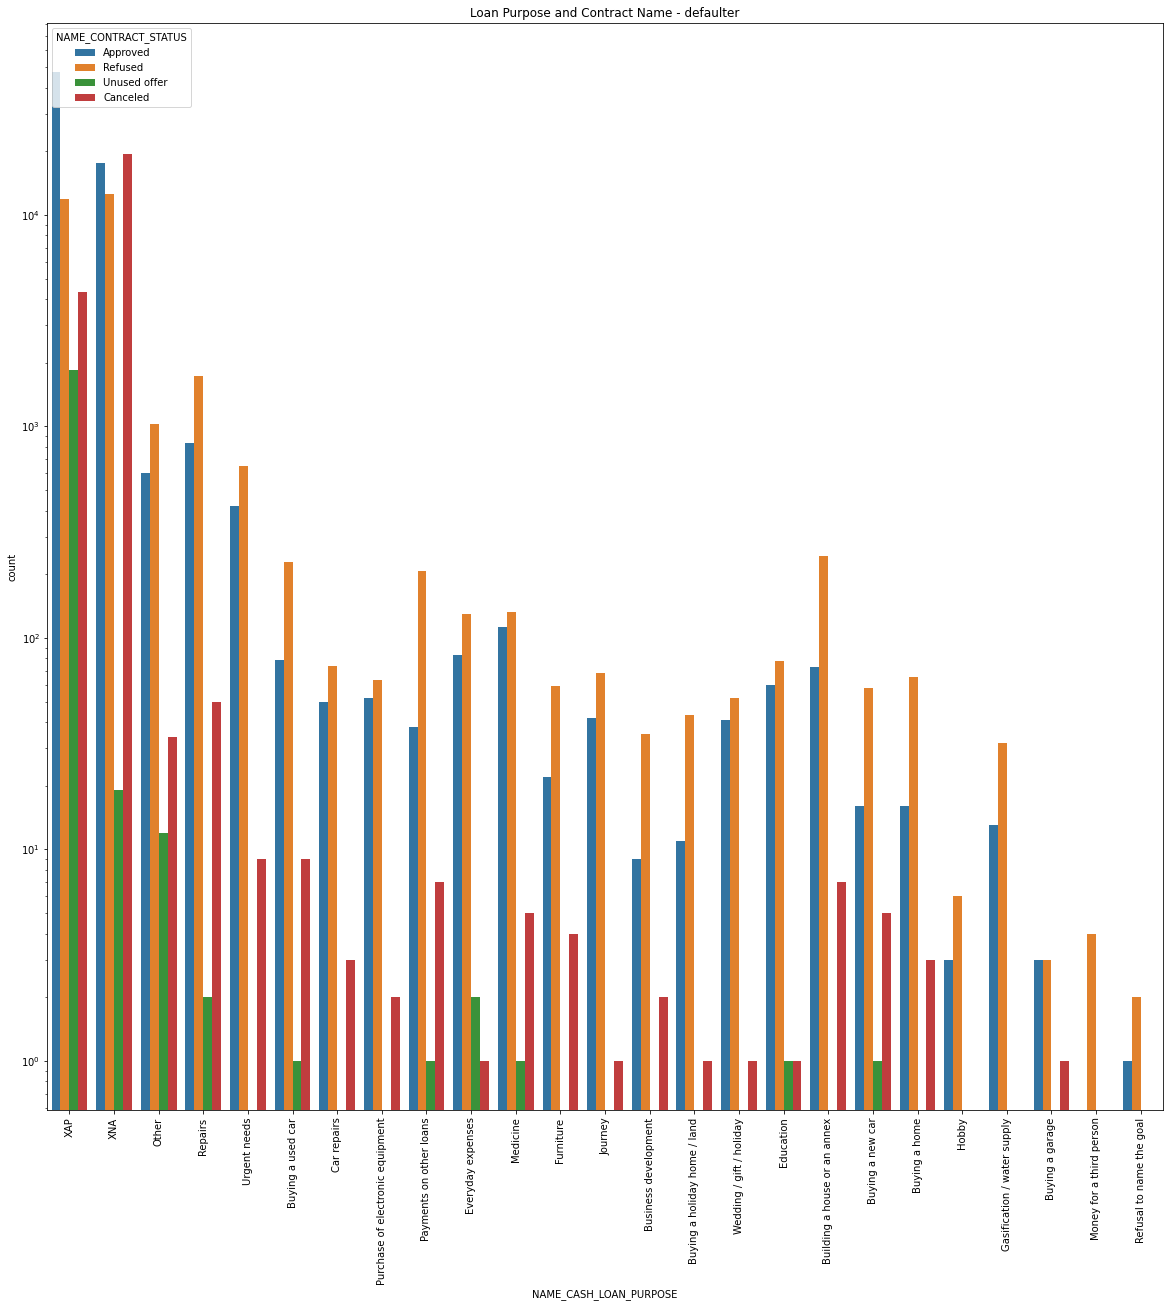

In [88]:
plt.figure(figsize = (20, 20))
sns.countplot(x='NAME_CASH_LOAN_PURPOSE',hue="NAME_CONTRACT_STATUS",data=DF1)
plt.yscale('log')
plt.title('Loan Purpose and Contract Name - defaulter')
plt.xticks(rotation=90)
plt.show()

1)Unknown reason (XNA ,XNP) are higher for both defaulter and repayer.

2)Repairing , Buying used car and Urgent needs are the top reason for applying loans.

3)Loan applied with "repairing" reason are mostly rejected followed by loan applied with reason "other" and "building house". Hence, these reasons are considered risky by banks.

3)Buying a garage, Hobby,Money for third purpose are least reason for applying loans.

### 14) CONCLUSION

1.Revolving loan is the bank should offer more as people choose it over cash loans.

2.People with academic degree has less defaults so bank should target this section.

3.People with higher education repays so bank should target this section.

4.Youth are most likely to default to bank can avoid them.

5.Single person are also most likely to default so bank can avoid them.

6.Senior citizen apply for loan most and they are more likely to repay if they have high income range.

7.Person who has house/apartments are also more likely to apply for loan so bank should target them.

8.Person with experience in job are less likely to default.